In [72]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#import csv
circuits_info_df = pd.read_csv("Resources/f1_circuits_all.csv")
fatalities_circuit_df = pd.read_csv("Resources/F1_fatalities_circuit.csv")
fatalities_driver_df = pd.read_csv("Resources/F1_fatalities_driver.csv")

In [20]:
circuits_info_df

,Circuit,Type,Direction,Location,Country,Last length used,Grands Prix,Season(s),Grands Prix held
0,Adelaide Street Circuit,Street circuit,Clockwise,Adelaide,Australia,3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11
1,Ain-Diab Circuit,Road circuit,Clockwise,Casablanca,Morocco,7.618 km (4.734 mi),Moroccan Grand Prix,1958,1
2,Aintree Motor Racing Circuit,Road circuit,Clockwise,Aintree,United Kingdom,4.828 km (3.000 mi),British Grand Prix,"1955, 1957, 1959, 1961–1962",5
3,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,5.278 km (3.280 mi),Australian Grand Prix,"1996–2019, 2022",25
4,Algarve International Circuit,Race circuit,Clockwise,Portimão,Portugal,4.653 km (2.891 mi),Portuguese Grand Prix,2020–2021,2
...,...,...,...,...,...,...,...,...,...
72,TI Circuit Aida,Race circuit,Clockwise,Mimasaka,Japan,3.703 km (2.301 mi),Pacific Grand Prix,1994–1995,2
73,Valencia Street Circuit,Street circuit,Clockwise,Valencia,Spain,5.419 km (3.367 mi),European Grand Prix,2008–2012,5
74,Watkins Glen International,Race circuit,Clockwise,Watkins Glen,United States,5.430 km (3.374 mi),United States Grand Prix,1961–1980,20
75,Yas Marina Circuit,Race circuit,Anti-clockwise,Abu Dhabi,United Arab Emirates,5.281 km (3.281 mi),Abu Dhabi Grand Prix,2009–2022,14


In [60]:
circuits_info_df.count()

Circuit             77
Type                77
Direction           77
Location            77
Country             77
Last length used    77
Grands Prix         77
Season(s)           76
Grands Prix held    77
dtype: int64

In [51]:
# New df that shows only circuit name, circuit type, and no. of GPs held.
circuit_type_df = circuits_info_df[['Circuit', 'Type', 'Grands Prix held']]
circuit_type_df.head()

,Circuit,Type,Grands Prix held
0,Adelaide Street Circuit,Street circuit,11
1,Ain-Diab Circuit,Road circuit,1
2,Aintree Motor Racing Circuit,Road circuit,5
3,Albert Park Circuit,Street circuit,25
4,Algarve International Circuit,Race circuit,2


In [52]:
# Total number of GPs held.
circuit_type_df = circuits_info_df[['Circuit', 'Type', 'Grands Prix held']]
circuit_type_df.sum()

Circuit             Adelaide Street CircuitAin-Diab CircuitAintree...
Type                Street circuitRoad circuitRoad circuitStreet c...
Grands Prix held                                                 1079
dtype: object

In [66]:
event_per_circuit_type_df = circuit_type_df.groupby(['Type']).sum()
event_per_circuit_type_df

,Grands Prix held
Type,
Race circuit,842
Road circuit,35
Street circuit,202


In [22]:
# Create new df pairing circuit and date of fatality
fatalities_circuit_date_df = fatalities_driver_df[['Date of accident', 'Circuit']]
fatalities_circuit_date_df = fatalities_circuit_date_df.drop([52,53,54])
fatalities_circuit_date_df.head()


,Date of accident,Circuit
0,"June 18, 1952",MIRA
1,"May 15, 1953",Indianapolis Motor Speedway
2,"September 18, 1953",Autodromo di Modena
3,"July 31, 1954",Nürburgring
4,"April 11, 1955",Circuit de Pau-Ville


In [23]:
# Remove days and months from "Date of accident" data
fatalities_circuit_date_df['Date of accident'].astype(str)
year_only = fatalities_circuit_date_df['Date of accident'].str.split('\, ').str[-1].str.strip()
fatalities_circuit_date_df
fatalities_circuit_date_df['Year of fatality'] = year_only
fatalities_circuit_year_df = fatalities_circuit_date_df.drop('Date of accident', axis=1)
fatalities_circuit_year_df.head()


,Circuit,Year of fatality
0,MIRA,1952
1,Indianapolis Motor Speedway,1953
2,Autodromo di Modena,1953
3,Nürburgring,1954
4,Circuit de Pau-Ville,1955


In [24]:
# Merge 'fatalities_circuit_year_df' and 'circuit_type_df'
# Merging on circuit_type_df as we want to exclude fatalities that did not occur at a track used for F1 races.
merged_df = pd.merge(circuit_type_df, fatalities_circuit_year_df, on= 'Circuit', how= 'left')
merged_df.groupby(['Circuit']).count()

# Notice now that there are 77 individual circuits, which matches the number of circuits from
# the original circuit type df.


,Type,Grands Prix held,Year of fatality
Circuit,,,
AVUS,1,1,0
Adelaide Street Circuit,1,1,0
Ain-Diab Circuit,1,1,1
Aintree Motor Racing Circuit,1,1,0
Albert Park Circuit,1,1,0
...,...,...,...
TI Circuit Aida,1,1,0
Valencia Street Circuit,1,1,0
Watkins Glen International,2,2,2


In [ ]:
# Show 

In [25]:
# .info() function shows that 44 deaths have occured at F1 tracks during testing, practice, qualifying, racing.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Circuit           100 non-null    object
 1   Type              100 non-null    object
 2   Grands Prix held  100 non-null    int64 
 3   Year of fatality  44 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.9+ KB


In [41]:
merged_df

,Circuit,Type,Grands Prix held,Year of fatality
0,Adelaide Street Circuit,Street circuit,11,NaN
1,Ain-Diab Circuit,Road circuit,1,1958
2,Aintree Motor Racing Circuit,Road circuit,5,NaN
3,Albert Park Circuit,Street circuit,25,NaN
4,Algarve International Circuit,Race circuit,2,NaN
...,...,...,...,...
95,Valencia Street Circuit,Street circuit,5,NaN
96,Watkins Glen International,Race circuit,20,1973
97,Watkins Glen International,Race circuit,20,1974
98,Yas Marina Circuit,Race circuit,14,NaN


In [44]:
# Exclude data which does not have an entry for "Year of fatality", implying no fatalities
# have occurred at that track.
fatal_events_df = merged_df.dropna()
fatal_events_df.count()

Circuit             44
Type                44
Grands Prix held    44
Year of fatality    44
dtype: int64

In [55]:
fatal_events_df

,Circuit,Type,Grands Prix held,Year of fatality
1,Ain-Diab Circuit,Road circuit,1,1958
6,Autodromo Enzo e Dino Ferrari,Race circuit,30,1994
7,Autodromo Enzo e Dino Ferrari,Race circuit,30,1994
8,Autódromo Hermanos Rodríguez,Race circuit,22,1962
13,Autodromo Nazionale di Monza,Race circuit,72,1961
14,Autodromo Nazionale di Monza,Race circuit,72,1970
15,Autodromo Nazionale di Monza,Race circuit,72,1978
19,Brands Hatch Circuit,Race circuit,14,1961
20,Brands Hatch Circuit,Race circuit,14,1971
21,Brands Hatch Circuit,Race circuit,14,1977


In [68]:
# By grouping this data we can determine the number of fatalities by circuit type
group_type_df = fatal_events_df.groupby(['Type'])
fatalities_per_circuit_type_df = group_type_df.count()
fatalities_per_circuit_type_df

# Interestingly, race circuits account for the vast majority of deaths, rather than road ro street circuits.

,Circuit,Grands Prix held,Year of fatality
Type,,,
Race circuit,39,39,39
Road circuit,3,3,3
Street circuit,2,2,2


In [57]:
# We can then determine the number of fatalities by circuit type
total_events_df = merged_df.groupby(['Type'])
total_events_df.count()

,Circuit,Grands Prix held,Year of fatality
Type,,,
Race circuit,71,71,39
Road circuit,10,10,3
Street circuit,19,19,2


In [63]:
# We can then determine the number of fatalities by circuit type
total_events_df = merged_df.groupby(['Type'])
total_events_df.head()

,Circuit,Type,Grands Prix held,Year of fatality
0,Adelaide Street Circuit,Street circuit,11,NaN
1,Ain-Diab Circuit,Road circuit,1,1958
2,Aintree Motor Racing Circuit,Road circuit,5,NaN
3,Albert Park Circuit,Street circuit,25,NaN
4,Algarve International Circuit,Race circuit,2,NaN
5,Autódromo do Estoril,Race circuit,13,NaN
6,Autodromo Enzo e Dino Ferrari,Race circuit,30,1994
7,Autodromo Enzo e Dino Ferrari,Race circuit,30,1994
8,Autódromo Hermanos Rodríguez,Race circuit,22,1962
16,AVUS,Road circuit,1,NaN


In [47]:
# Showing the no. of fatalities by circuit.
group_circuit_df = fatal_events_df.groupby(['Circuit'])
group_circuit_df.count()

,Type,Grands Prix held,Year of fatality
Circuit,,,
Ain-Diab Circuit,1,1,1
Autodromo Enzo e Dino Ferrari,2,2,2
Autodromo Nazionale di Monza,3,3,3
Autódromo Hermanos Rodríguez,1,1,1
Brands Hatch Circuit,3,3,3
Circuit Gilles-Villeneuve,1,1,1
Circuit Paul Ricard,1,1,1
Circuit Zandvoort,3,3,3
Circuit Zolder,1,1,1


In [48]:
# Showing no. of fatalities by year.
# Showing the no. of fatalities by circuit.
group_year_df = fatal_events_df.groupby(['Year of fatality'])
group_year_df.count()

,Circuit,Type,Grands Prix held
Year of fatality,,,
1953,1,1,1
1954,1,1,1
1955,2,2,2
1957,1,1,1
1958,4,4,4
1959,2,2,2
1960,2,2,2
1961,3,3,3
1962,1,1,1


In [71]:
# Merge event per ciruit type df and fatalities per circuit type df.
final_df = pd.merge(event_per_circuit_type_df, fatalities_per_circuit_type_df, on='Type', how='left')
final_df = final_df.drop(['Circuit','Grands Prix held_y'], axis=1)
final_df = final_df.rename(columns={'Grands Prix held_x':'Grands Prix held', 'Year of fatality':'No. of fatalities'})
final_df

,Grands Prix held,No. of fatalities
Type,,
Race circuit,842,39
Road circuit,35,3
Street circuit,202,2


In [89]:
final_df['Fatalities per Grands Prix'] = final_df['No. of fatalities']/final_df['Grands Prix held']
final_df['Grands Prix Needed for One Fatality'] = final_df['Grands Prix held']/final_df['No. of fatalities']
final_df = final_df.reset_index()
final_df



,index,Type,Grands Prix held,No. of fatalities,Fatalities per Grands Prix,Grands Prix Needed for One Fatality
0,0,Race circuit,842,39,0.046318,21.589744
1,1,Road circuit,35,3,0.085714,11.666667
2,2,Street circuit,202,2,0.009901,101.000000


<function matplotlib.pyplot.show(*args, **kw)>

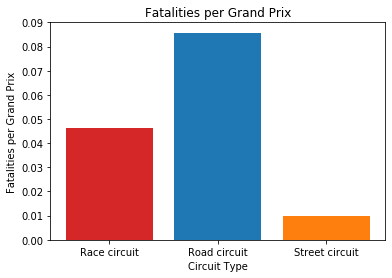

In [97]:
# Relative frequency of fatalities at GP event by circuit type
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
plt.bar(final_df['Type'], final_df['Fatalities per Grands Prix'], color= bar_colors)
plt.title('Fatalities per Grand Prix')
plt.xlabel('Circuit Type')
plt.ylabel('Fatalities per Grand Prix')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

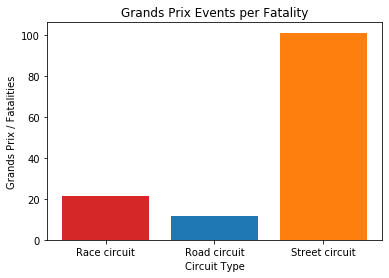

In [95]:
# Relative frequency of fatalities at GP event by circuit type
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
plt.bar(final_df['Type'], final_df['Grands Prix Needed for One Fatality'], color= bar_colors)
plt.title('Grands Prix Events per Fatality')
plt.xlabel('Circuit Type')
plt.ylabel('Grands Prix / Fatalities')
plt.show